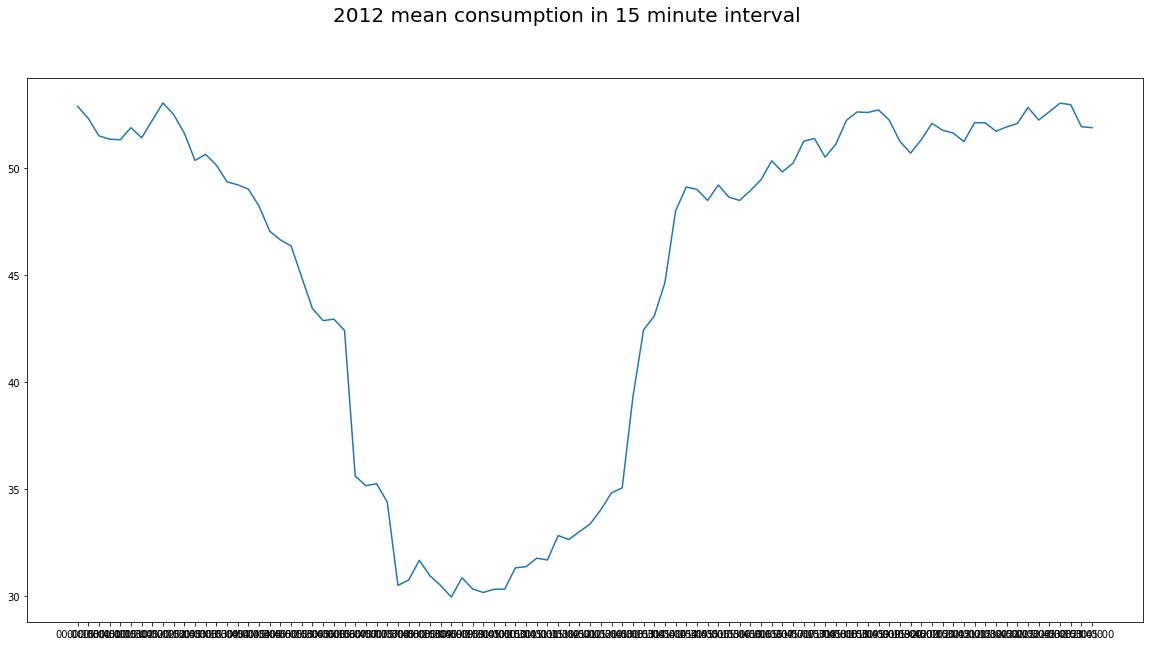

In [19]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime
import os
from datetime import timedelta

workingDir = os.path.realpath(os.path.dirname('C:/Users/apb38/Desktop/DR/datasets/Enernoc-data/'))
outputDir = os.path.realpath(os.path.dirname('C:/Users/apb38/Documents/GitHub/LoadFlexibility/'))
inputDir = os.path.join(workingDir, "csv")
SCEinput = os.path.join(outputDir, "input")
%matplotlib inline

#check if the given file is in dttm_utc format before creating the new SCE format time
df=pd.read_csv(os.path.join(inputDir, "281.csv"),header=0, parse_dates=['dttm_utc'])
myarray = df[['value']]
sumevery3rows = myarray.groupby(myarray.index//3*3).sum()
sumevery3rows.reset_index(drop=True)

a=pd.date_range("00:00", "23:45", freq="15min").time.astype(str)
#make a dataframe and shift 00:00 to the bottom
minutes = pd.DataFrame(a)
target_row=minutes.loc[[0],:]
minutes=minutes.shift(-1)
minutes.iloc[-1] = target_row.squeeze()

#make time 366 times so can merge later
fifteen_min = pd.concat([minutes]*366)
fifteen_min.columns=['fifteen_interval']
sumevery3rows.index = range(len(sumevery3rows.index)) #index is the same before concat
fifteen_min.index = range(len(fifteen_min.index))

#merge all the data 
result = pd.concat([fifteen_min, sumevery3rows], axis=1, join='inner')
result.columns=['time_of_day','KWH']
mean_intervals= result.groupby('time_of_day')[['KWH']].mean()

#plot
x=mean_intervals.index
y=mean_intervals['KWH']
fig1 = plt.figure(figsize=(20,10))
fig1.suptitle('2012 mean consumption in 15 minute interval', fontsize=20)
plt.plot(x,y)
# plot looks like low consumption during daytime, which is not true for groceries store

####################%%

#create SCE format time
#stack: Generate 12/31/2012 16:15 to 1/1/2013 23:45 (since local time is 16:15 the day before)
#assuming these to be the last of the year 2012 that can be moved to the end of data later(make data easier to look at)
def perdelta4(start4, end4, delta):
    curr4 = start4
    while curr4 <=end4:
        yield curr4
        curr4 += delta
dtfmt = '%Y-%m-%d %H:%M'

a4 = '2012-12-31 16:15'
b4 = '2013-1-1 00:00' 

start4 = datetime.datetime.strptime(a4,dtfmt)
end4 = datetime.datetime.strptime(b4,dtfmt)

stack4=[]

def perdelta(start, end, delta):
    curr = start
    while curr <=end:
        yield curr
        curr += delta
dtfmt = '%Y-%m-%d %H:%M'

a = '2012-1-1 00:15'
b = '2012-3-11 01:45'

start = datetime.datetime.strptime(a,dtfmt)
end = datetime.datetime.strptime(b,dtfmt)

stack=[]

def perdelta1(start1, end1, delta1):
    curr1 = start1
    while curr1 <=end1:
        yield curr1
        curr1 += delta1
dtfmt = '%Y-%m-%d %H:%M'

a1 = '2012-3-11 03:00'
b1 = '2012-11-4 01:45'
start1 = datetime.datetime.strptime(a1,dtfmt)
end1 = datetime.datetime.strptime(b1,dtfmt)

stack1=[]

def perdelta2(start2, end2, delta2):
    curr2 = start2
    while curr2 <=end2:
        yield curr2
        yield curr2 #do it 2 times to match SCE format
        curr2 += delta2
dtfmt = '%Y-%m-%d %H:%M'


a2 = '2012-11-4 02:00'
b2 = '2012-11-4 02:45'
start2 = datetime.datetime.strptime(a2,dtfmt)
end2 = datetime.datetime.strptime(b2,dtfmt)

stack2=[]

def perdelta3(start3, end3, delta3):
    curr3 = start3
    while curr3 <=end3:
        yield curr3   
        curr3 += delta3
dtfmt = '%Y-%m-%d %H:%M'

a3 = '2012-11-4 03:00'
b3 = '2012-12-31 16:00'

start3 = datetime.datetime.strptime(a3,dtfmt)
end3 = datetime.datetime.strptime(b3,dtfmt)

stack3=[]

#Create normalized data file and run normalized tests

data = pd.read_csv(os.path.join(inputDir, "all_sites.csv"))
groceries = data[data['SUB_INDUSTRY'] == 'Grocer/Market'] #only take groceries
LA_groceries = groceries[groceries['TIME_ZONE'] == 'America/Los_Angeles'] #only take groceries in LA
LA_groceries = LA_groceries.reset_index()

SCEformat=pd.DataFrame()
def normalized_data(UniqueIDq):
    df2=pd.read_csv(os.path.join(inputDir, str(UniqueID)+'.csv'),header=0,parse_dates=['dttm_utc'])
    df2.rename(columns={'value':'Usage_KWH'},inplace=True)
    myarray = df2[['Usage_KWH']]
    load = myarray.groupby(myarray.index//3*3).sum() #sum every 3 rows to get 15 min usage data
    load.index = range(len(load.index))
    load = load.assign(CustomerID= str(UniqueID))
    load = pd.merge(SCE_format,load,left_index=True,right_index=True)
    target_row=load.head(32) #put the 2012/12/31 the last 8 hours or 32 datapoints from top to bottom of the dataframe based on assumption
    load = load.drop(load.index[0:32])
    load =load.append(target_row)
    load = load.reset_index(drop=True)
    return (load)

for result in perdelta4(start4 , end4, timedelta(minutes=15)):
    stack4.append(str(result))
stack4=pd.DataFrame(stack4)

for result in perdelta(start , end, timedelta(minutes=15)):
    stack.append(str(result))
stack=pd.DataFrame(stack)

for result in perdelta1(start1 , end1, timedelta(minutes=15)):
    stack1.append(str(result))
stack1=pd.DataFrame(stack1)

for result in perdelta2(start2 , end2, timedelta(minutes=15)):
    stack2.append(str(result))
stack2=pd.DataFrame(stack2)

for result in perdelta3(start3 , end3, timedelta(minutes=15)):
    stack3.append(str(result))
stack3=pd.DataFrame(stack3)

SCE_format=stack4.append([stack,stack1,stack2,stack3]) #append all the stack to create 1 SCE format
pd.DataFrame(SCE_format)
SCE_format.columns=['DateTime']
SCE_format=SCE_format.reset_index(drop=True)

for i in range(len(LA_groceries)):
    UniqueID = LA_groceries.loc[i,'SITE_ID']
    SCEformat = SCEformat.append(normalized_data(UniqueID))

SCEformat = SCEformat.reset_index(drop=True)
SCEformat.to_csv(os.path.join(SCEinput,"SCE-format-data.csv"))




In [17]:
SCE_format.dtypes

DateTime    object
dtype: object